# K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_completeness_v_measure
%matplotlib inline

## Exemplos

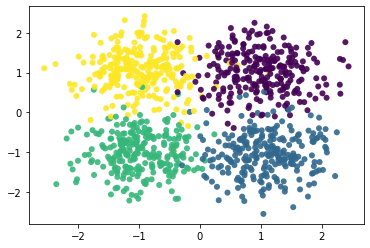

In [2]:
# Sample Generator
from sklearn.datasets import make_blobs
centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]
X, y = make_blobs(n_samples = 1000, centers = centers, cluster_std = 0.5, random_state = 101)
plt.scatter(X[:,0], X[:,1], c = y, edgecolors = 'none', alpha = 0.9)
plt.show()

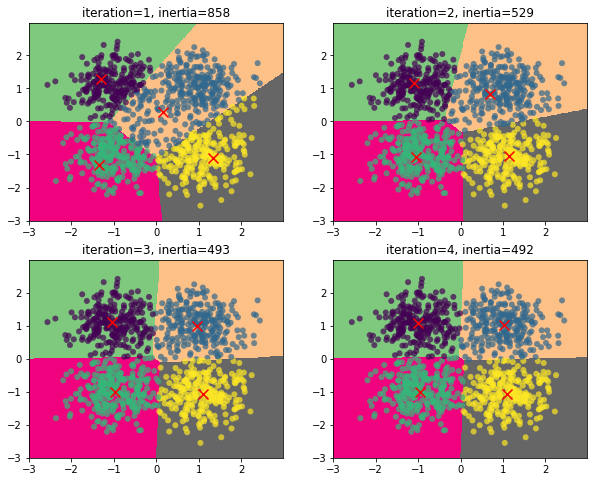

In [3]:
# Plot dos Clusters nas Células de Voronoi
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

for n_iter in range(1, 5):

    cls = KMeans(n_clusters = 4, max_iter = n_iter, n_init = 1, init = 'random', random_state = 101)
    cls.fit(X)
    
    # Plot
    plt.subplot(2, 2, n_iter)
    h = 0.02
    xx, yy = np.meshgrid(np.arange(-3, 3, h), np.arange(-3, 3, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.imshow(Z, 
               interpolation = 'nearest', 
               cmap=plt.cm.Accent,
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               aspect = 'auto', 
               origin = 'lower')

    # Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.
    # Iteration = Número de iterações definido pelo parâmero n_iter definido acima
    plt.scatter(X[:,0], X[:,1], c = cls.labels_, edgecolors = 'none', alpha = 0.7)
    plt.scatter(cls.cluster_centers_[:,0], cls.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)
    plt.title("iteration=%s, inertia=%s" %(n_iter, int(cls.inertia_)))

plt.show()

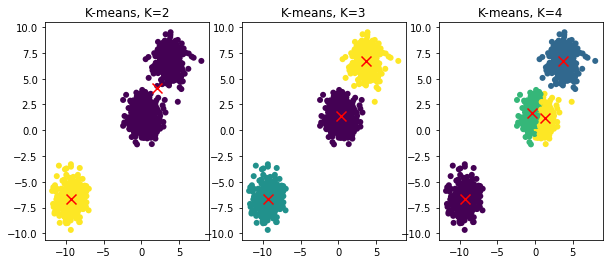

In [4]:
# Diferenças nos clusters de acordo com os valores de K
pylab.rcParams['figure.figsize'] = (10.0, 4.0)
X, _ = make_blobs(n_samples = 1000, centers = 3, random_state = 101)

for K in [2, 3, 4]:
    cls = KMeans(n_clusters = K, random_state = 101)
    y_pred = cls.fit_predict(X)
    
    plt.subplot(1, 3, K-1)
    plt.title("K-means, K=%s" % K)
    plt.scatter(X[:, 0], X[:, 1], c = y_pred, edgecolors = 'none')
    plt.scatter(cls.cluster_centers_[:,0], cls.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)

plt.show()

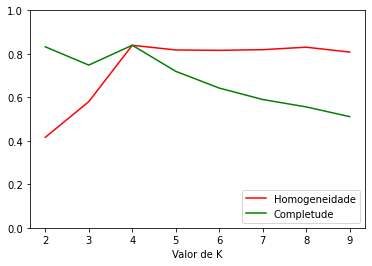

In [5]:
# Checando a homogeneidade dentro do cluster
pylab.rcParams['figure.figsize'] = (6.0, 4.0)


centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]
X, y = make_blobs(n_samples = 1000, centers = centers, cluster_std = 0.5, random_state = 101)

Ks = range(2, 10)
HCVs = []
for K in Ks:
    y_pred = KMeans(n_clusters = K, random_state = 101).fit_predict(X)
    HCVs.append(homogeneity_completeness_v_measure(y, y_pred))

plt.plot(Ks, [el[0] for el in HCVs], 'r', label = 'Homogeneidade')
plt.plot(Ks, [el[1] for el in HCVs], 'g', label = 'Completude')
plt.ylim([0, 1])
plt.xlabel("Valor de K")
plt.legend(loc=4)
plt.show()

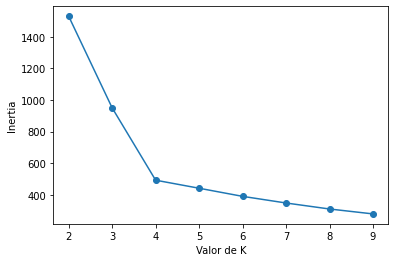

In [6]:
# Inertia = Soma das distâncias das amostras para o seu centro de agrupamento mais próximo.
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(X)
    Ds.append(cls.inertia_)

plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()